In [ ]:
# import dataset
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
#  Train test split
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

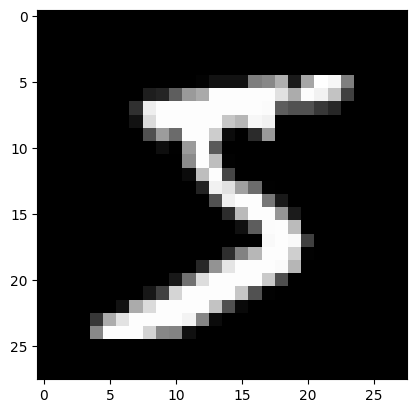

In [ ]:
# import plt
import matplotlib.pyplot as plt
plt.imshow(xtrain[0],cmap='gray')
plt.show()

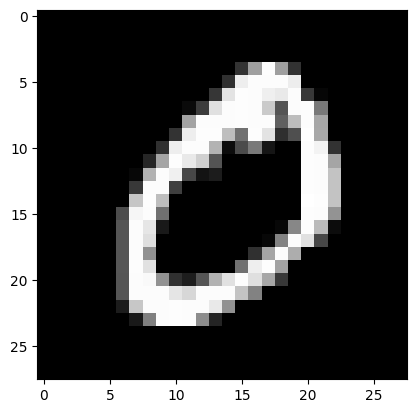

In [ ]:
plt.imshow(xtrain[1],cmap='gray')
plt.show()

In [ ]:
import seaborn as sns

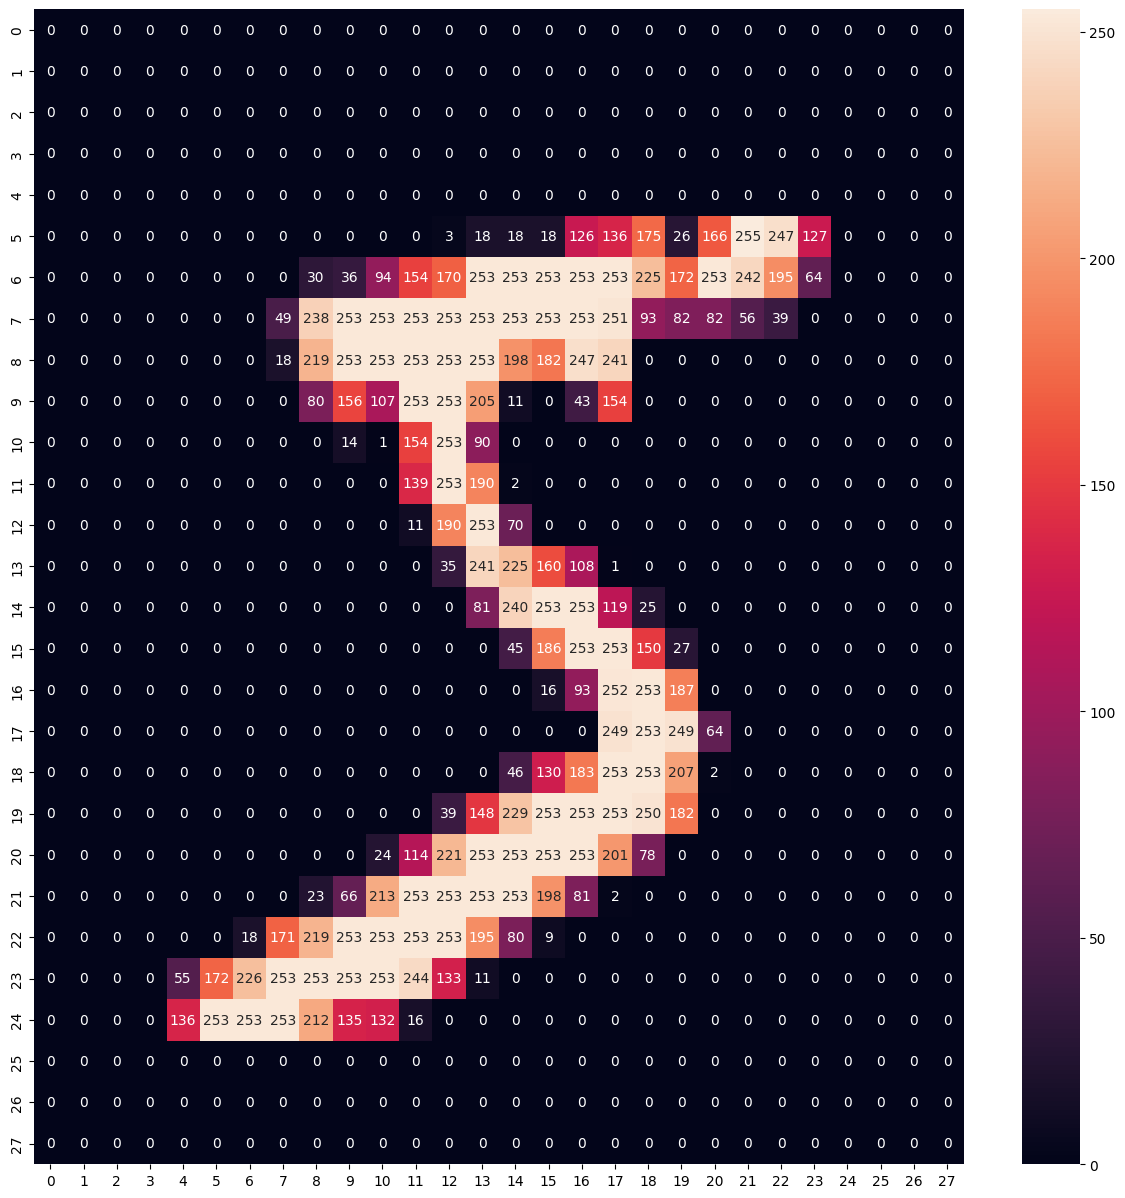

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(xtrain[0],annot=True,fmt='d')
plt.show()

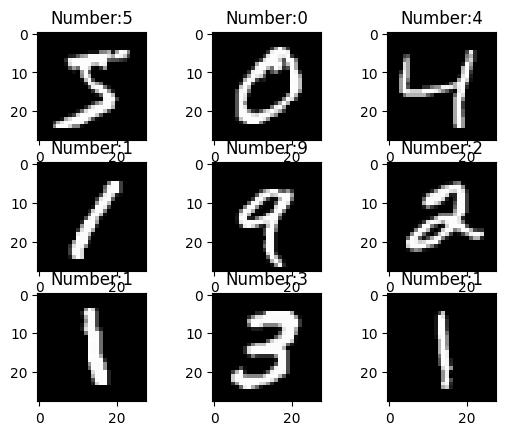

In [ ]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(xtrain[i],cmap='gray')
    plt.title(f'Number:{ytrain[i]}')

In [ ]:
# pixel values are between 0-255, so divide xtrain and xtest by 255 to scale it in range of 0 to 1.
xtrain_scl=xtrain.astype('float32')/255
xtest_scl=xtest.astype('float32')/255

In [ ]:
# check how many unique values are in output training data
import numpy as np

In [ ]:
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
# for multiclass classificaton apply one hot encoding
from keras.utils import to_categorical
ytrain_cat=to_categorical(ytrain)
ytest_cat=to_categorical(ytest)

In [ ]:
ytrain_cat[0:3]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [ ]:
ytrain[0:3]

array([5, 0, 4], dtype=uint8)

In [ ]:
# initilize the model
from keras.models import Sequential
from keras.layers import Input,Convolution2D, MaxPool2D,Flatten,Dropout,Dense

In [ ]:
#
model=Sequential()

In [ ]:
# Add input layer
model.add(Input(shape=(28,28,1)))

In [ ]:
# AddConvolution Layer 1
model.add(Convolution2D(filters=32,kernel_size=(3,3),activation='relu'))

In [ ]:
# We don't have to worry about  values in filter
model.add(MaxPool2D(pool_size=(2,2)))

In [ ]:
# Add convolution layer 2
model.add(Convolution2D(filters=64,activation='relu',kernel_size=(3,3)))

In [ ]:
# Add Max pooling layer 2
model.add(MaxPool2D(pool_size=(2,2)))

In [ ]:
# Add flatten layer
model.add(Flatten())

In [ ]:
# Add dropout layer
model.add(Dropout(rate=0.5))

In [ ]:
# Create an output layer
model.add(Dense(units=ytrain_cat.shape[1],activation='softmax'))

In [ ]:
# Compile and fit model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
hist=model.fit(xtrain,ytrain_cat,validation_split=0.2,epochs=15)

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7907 - loss: 2.3192 - val_accuracy: 0.9748 - val_loss: 0.0841
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9513 - loss: 0.1598 - val_accuracy: 0.9793 - val_loss: 0.0698
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9663 - loss: 0.1118 - val_accuracy: 0.9832 - val_loss: 0.0552
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9701 - loss: 0.1001 - val_accuracy: 0.9834 - val_loss: 0.0559
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9699 - loss: 0.0980 - val_accuracy: 0.9843 - val_loss: 0.0562
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9722 - loss: 0.0888 - val_accuracy: 0.9862 - val_loss: 0.0462
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9736 - loss: 0.0870 - val_accuracy: 0.9852 - val_loss: 0.0507
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9770 - loss: 0.0772 - 

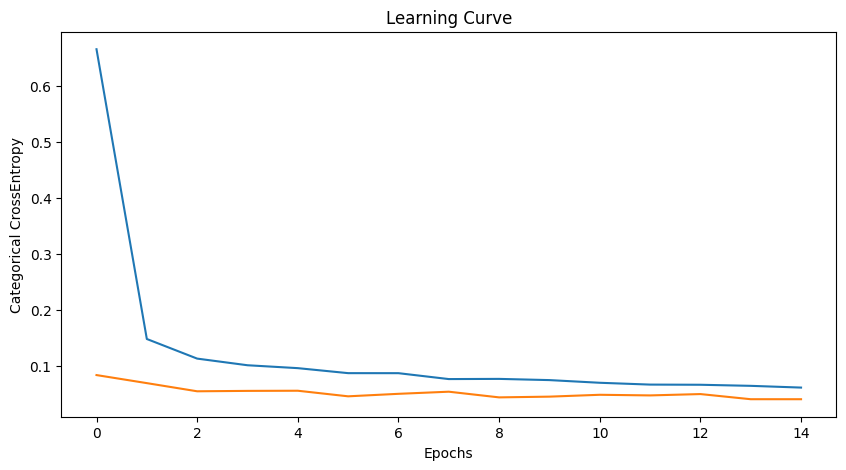

In [ ]:
# Plot learning curve
plt.figure(figsize=(10,5))
plt.plot(hist.history['loss'],label='Train Loss')
plt.plot(hist.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Categorical CrossEntropy')
plt.title('Learning Curve')
plt.show()

In [ ]:
# model evaluation
model.evaluate(xtrain,ytrain_cat)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9938 - loss: 0.0207


[0.02347053773701191, 0.9930333495140076]

In [ ]:
# Predict probabilities for training and testing
yprob_train=model.predict(xtrain)
yprob_test=model.predict(xtest)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
yprob_train[:5]

array([[9.2934037e-12, 4.8213356e-12, 1.0826561e-09, 7.0107571e-04,
        4.6056491e-13, 9.9929821e-01, 4.8177489e-09, 2.2140453e-10,
        7.4106373e-07, 1.9063981e-08],
       [9.9999988e-01, 5.0772346e-16, 2.7155549e-08, 1.9368266e-11,
        4.4029277e-14, 3.0622959e-12, 6.1562262e-09, 2.3357941e-12,
        1.4488921e-07, 2.8996101e-09],
       [8.0893456e-14, 3.6226584e-06, 9.6068951e-12, 7.1913940e-11,
        9.9999404e-01, 3.3539069e-09, 1.1248835e-11, 1.7518684e-06,
        9.2104472e-08, 4.2995052e-07],
       [1.2060630e-08, 9.9998355e-01, 1.3841644e-06, 8.0507656e-10,
        3.6713577e-06, 1.3516057e-11, 3.9728231e-08, 3.6992842e-06,
        7.6759870e-06, 2.2075248e-09],
       [5.8304876e-12, 3.3380687e-11, 1.0387810e-10, 1.4150309e-09,
        7.9597485e-06, 1.1820286e-11, 1.7689207e-14, 2.4069857e-06,
        2.5718933e-04, 9.9973243e-01]], dtype=float32)

In [ ]:
# give final predictions
ypred_train=np.argmax(yprob_train,axis=1)
ypred_test=np.argmax(yprob_test,axis=1)

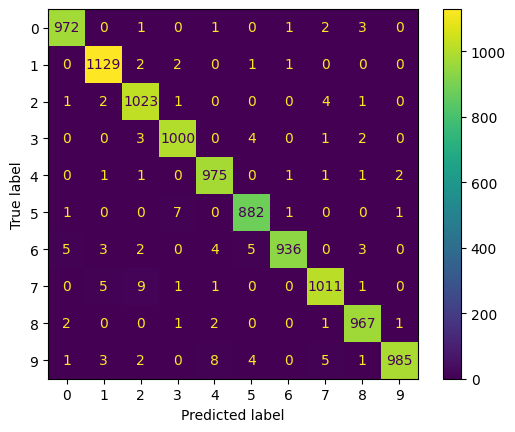

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf=confusion_matrix(ytest,ypred_test)
cfd=ConfusionMatrixDisplay(cf)
cfd.plot()